<h1>
<font color="#ff2e2e">
CamScanner
</font>
</h1>

In [317]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

<h3><font color = "#079e05"> Utilities </font></h3>

In [318]:
def imshow(im):
    width, height, *channels = im.shape
    if channels:
        # By default, OpenCV tends to work with images in the BGR format.
        # This is due to some outdated practices, but it has been left in the library.
        # We can iterate the channels in reverse order to get an RGB image.
        plt.imshow(im[:,:,::-1])
    else:
        plt.imshow(im, cmap='gray')
    # plt.axis('off')
    plt.show()

In [319]:
def reorder(vertices):
    # OpenCV *prefers* if we use `np.float32`.
    reordered = np.zeros_like(vertices, dtype=np.float32)
    add = vertices.sum(1)
    reordered[0] = vertices[np.argmin(add)]
    reordered[2] = vertices[np.argmax(add)]
    diff = np.diff(vertices, axis=1)
    reordered[1] = vertices[np.argmin(diff)]
    reordered[3] = vertices[np.argmax(diff)]
    return reordered

<h3><font color = "#079e05"> Image </font></h3>

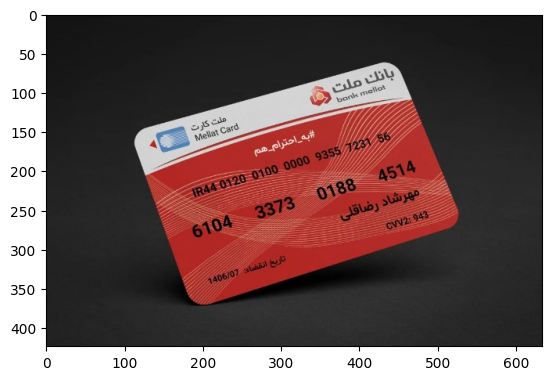

In [320]:
im = cv2.imread('images/Q4/10.jpg')

imshow(im)

<h3><font color = "#079e05"> Process </font></h3>

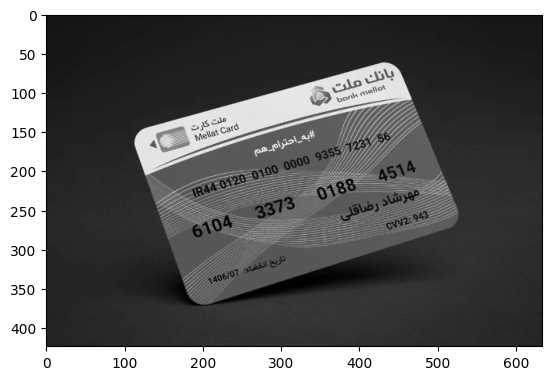

In [321]:
#Grayscale
img = im.copy()  
grayimg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY).astype('uint8')


imshow(grayimg)

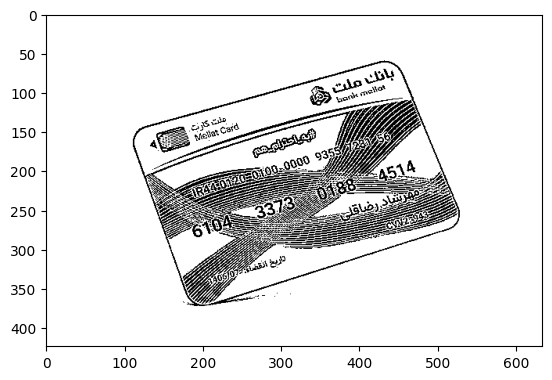

In [322]:
# Bilateral filter
import math
img1=img.copy()
bilateralimg = cv2.bilateralFilter(grayimg, 10, 10, 10)

th2 = cv2.adaptiveThreshold(bilateralimg,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,5,2)

# kernel=np.ones((1,2))
# edge1=cv2.dilate(th2,kernel)
# kernel=np.ones((1,8))
# edge1=cv2.dilate(th2,kernel)
edge1=th2.copy()


imshow(edge1)


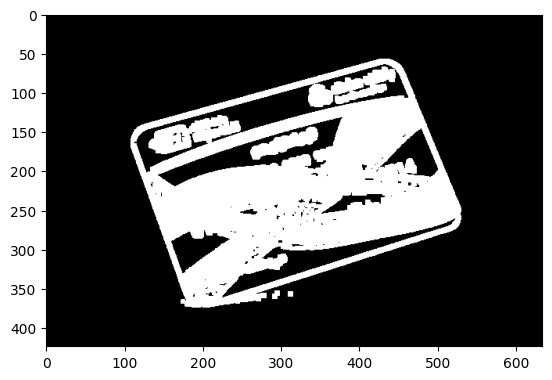

In [323]:
edgesimg = cv2.Canny(edge1, 50, 60, None, 3)

# تعریف عملیات افزایش اندازه لبه
kernel_dilate = np.ones((5, 5), np.uint8)
img_dilate = cv2.dilate(edgesimg , kernel_dilate, iterations=1)

# # تعریف عملیات کاهش اندازه لبه
# kernel_erode = np.ones((3, 3), np.uint8)
# img_edge = cv2.erode(img_dilate, kernel_erode, iterations=1)
imshow(img_dilate)

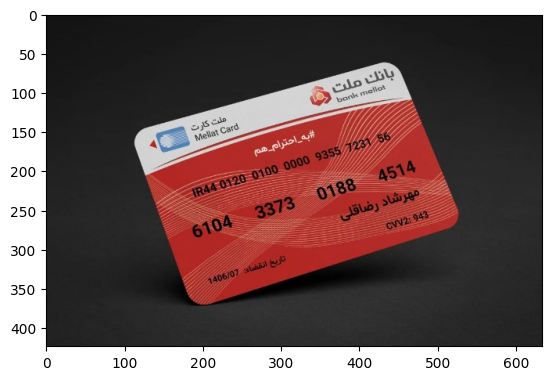

In [324]:
img1=img.copy()
lines = cv2.HoughLines(edgesimg, 1, np.pi / 180, 150, None, 0, 0)

    # Below we will display the result by drawing lines
if lines is not None:
    for i in range(0, len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 1000 * (-b)), int(y0 + 1000 * (a)))
        pt2 = (int(x0 - 1000 * (-b)), int(y0 - 1000 * (a)))
        cv2.line(img1, pt1, pt2, (0, 0, 255), 3, cv2.LINE_AA)
    
imshow(img1)   

In [325]:
def biggestcontour(contours):
    biggest=np.array([])
    max_area=0
    for i in contours:
        area=cv2.contourArea(i)
        if area>100:
            peri=cv2.arcLength(i,True)
            approx=cv2.approxPolyDP(i,0.02*peri,True)
            if area>max_area and len(approx)>3:
                biggest=approx
                max_area=area
    return biggest,max_area            

4
[[451.  63.]
 [113. 147.]
 [172. 369.]
 [527. 270.]]


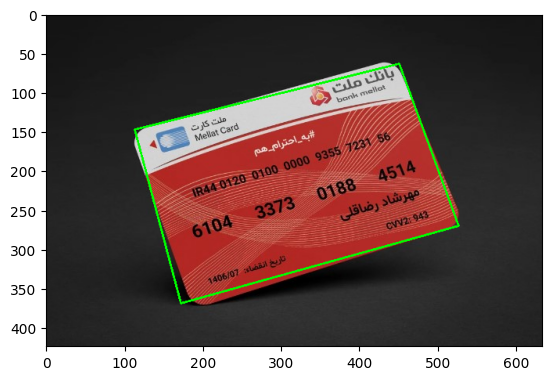

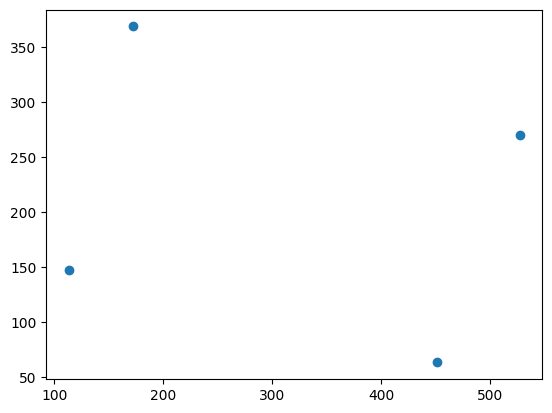

In [326]:
# # # # Contour Detection
img1=im.copy()

# # پیدا کردن کانتورها و مساحت آن‌ها
# contours, hierarchy = cv2.findContours(img_dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# contour_areas = [cv2.contourArea(c) for c in contours]

# # پیدا کردن کانتور با بیشترین مساحت
# max_contour_idx = np.argmax(contour_areas)
# max_contour = contours[max_contour_idx]

# # پیدا کردن مستطیل دور کانتور
# x, y, w, h = cv2.boundingRect(max_contour)

# x1, y1 = x, y
# x2, y2 = x + w, y
# x3, y3 = x + w, y + h
# x4, y4 = x, y + h
# cornerpoints=[]
# cornerpoints.append([x1,y1])
# cornerpoints.append([x2,y2])
# cornerpoints.append([x3,y3])
# cornerpoints.append([x4,y4])

# cornerpoints=np.array(cornerpoints, dtype = 'object')
# cornerpoints=np.float32(cornerpoints) 
# print(cornerpoints)

# # رسم مستطیل دور کانتور
# cv2.rectangle(img1, (x, y), (x + w, y + h), (0, 0, 255), 2)
# plt.imshow(img1)


# Find contours in the image
contours, hierarchy = cv2.findContours(img_dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# a=biggestcontour(contours)
# # Find the largest contour
# largest_contour = max(contours, key=cv2.contourArea)

# Find the corners of the largest contour
# corners = cv2.approxPolyDP(largest_contour, 0.02 * cv2.arcLength(largest_contour, True), True)

# for i in corners:
#     print(i[0][0])
    
# imshow(img1)
# plt.scatter([x[0][0] for x in corners], [x[0][1] for x in corners])      
max_area = 0
max_contour = []
# # # print(top_right,top_right,bottom_left,bottom_right)
# # # Find the paper's contour
for c in contours:
    # Find the contour perimeter
    perimeter = cv2.arcLength(c, True)
    # Approximate the paper's contour with approxPolyDP function
    approx = cv2.approxPolyDP(c, 0.02 * perimeter, True)
    area = cv2.contourArea(c)
    cornerpoints=[]
    # If the contour has four sides, show it
    if len(approx) ==4 and area>max_area:
        max_area = area
        max_contour = approx
print(len(max_contour))        
if len(max_contour)>0:
    cv2.drawContours(img1, [max_contour], -1, (0, 255, 0), 2)
    for point in max_contour:
        x, y = point.ravel()
        cornerpoints.append([x,y])                   
cornerpoints=np.array(cornerpoints, dtype = 'object')
cornerpoints=np.float32(cornerpoints)        
print(cornerpoints)        
imshow(img1)
plt.scatter([x for x, y in cornerpoints], [y for x, y in cornerpoints]) 
        

[[113. 147.]
 [451.  63.]
 [527. 270.]
 [172. 369.]]


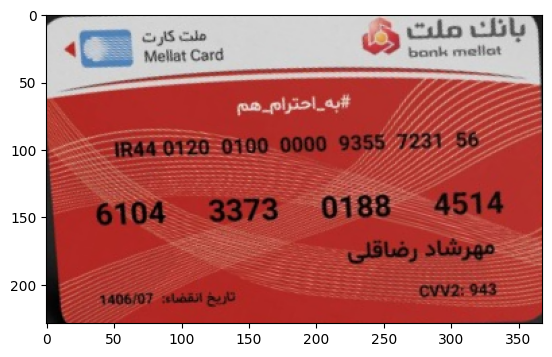

(229, 368, 3)


In [327]:
# Reorder the corner points
cornerpoints = reorder(cornerpoints)


print(cornerpoints)

# Assign the corner points to variables
(w1, w2, h1, h2) = cornerpoints

# Calculate the width and height of the image
FirstWidth = np.sqrt((((w2[1] - w1[1]) ** 2) + (w2[0] - w1[0]) ** 2))
SecondWidth = np.sqrt((((h1[1] - h2[1]) ** 2) + (h1[0] - h2[0]) ** 2))
FirstHeight = np.sqrt((((w2[1] - h1[1]) ** 2) + (w2[0] - h1[0]) ** 2))
SecondHeight = np.sqrt((((w1[1] - h2[1]) ** 2) + (w1[0] - h2[0]) ** 2))

# Determine the best width and height
BestWidth = max(int(FirstWidth), int(SecondWidth))
BestHeight = max(int(FirstHeight), int(SecondHeight))

# Define the destination points for the perspective transform
a = [0, 0]
b = [BestWidth - 1, 0]
c = [BestWidth - 1, BestHeight - 1]
d = [0, BestHeight - 1]
dest = np.array([ a, b, c, d], dtype = "float32")

# Get the perspective transform matrix
M = cv2.getPerspectiveTransform(cornerpoints, dest) 

# Apply the perspective transform to the image
finalimg = cv2.warpPerspective(im, M, (BestWidth, BestHeight))

# Display the cropped image
imshow(finalimg)
print(finalimg.shape)

finalimg=cv2.resize(finalimg,(1218,718))

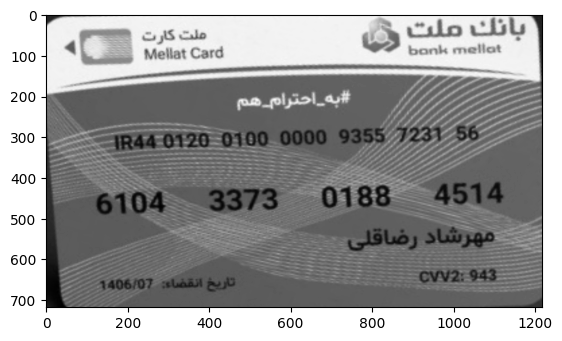

In [328]:
finalimggray=cv2.cvtColor(finalimg,cv2.COLOR_BGR2GRAY)
plt.imshow(finalimggray,cmap='gray')

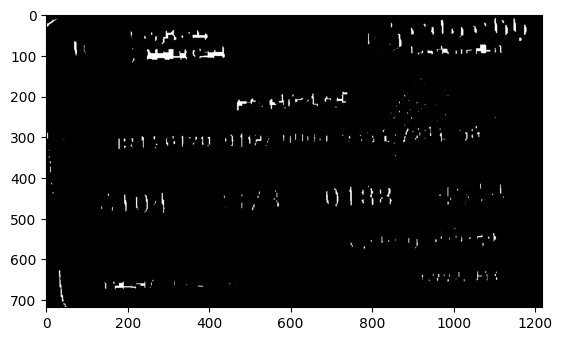

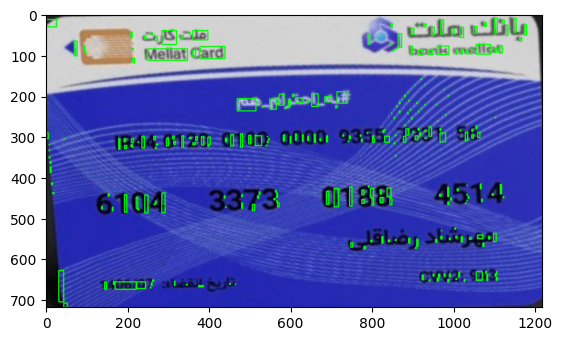

In [329]:
aa=finalimg.copy()
# Apply the Sobel filter
sobelx = cv2.Sobel(finalimggray, cv2.CV_8U, 1, 0, ksize=3)
sobelx=np.abs(sobelx)
# plt.imshow(sobelx,cmap='gray')


# Apply thresholding to convert the image to black and white
thresh_value = 100
ret, thresh = cv2.threshold(sobelx, thresh_value, 255, cv2.THRESH_BINARY)


# Define the vertical structuring element
# kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 2))

# # Apply the morphological opening operation
# opened = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)



# Define the horizontal structuring element
kernel1 = cv2.getStructuringElement(cv2.MORPH_RECT, (10, 8))

# Apply the morphological closing operation
closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel1)

imshow(closed)

# # Define the vertical structuring element
# kernel2 = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 10))

# # Apply the morphological opening operation
# opened1 = cv2.morphologyEx(closed , cv2.MORPH_OPEN, kernel)


contours, hierarchy = cv2.findContours(closed, 
    cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
  
  
# print("Number of Contours found = " + str(len(contours)))
  
# # Draw all contours
# # -1 signifies drawing all contours
# cv2.drawContours(aa, contours, -1, (0, 255, 0), 3)

# Draw bounding rectangles for each contour
for cnt in contours:
    # Calculate bounding rectangle for the contour
    x, y, w, h = cv2.boundingRect(cnt)
    # Draw the rectangle on the image
    cv2.rectangle(aa, (x, y), (x + w, y + h), (0, 255, 0), 2)

plt.imshow(aa   ,cmap='gray')



In [330]:
# Improve image quality

# Create a sharpening kernel
kernel_sharpening = np.array([[-1,-1,-1],[-1, 9,-1],[-1,-1,-1]])

# Apply the sharpening kernel to the image
sharpeimg = cv2.filter2D(finalimg, -1, kernel_sharpening)

# Convert the image to the HSV color space
huesaturationvalue = cv2.cvtColor(sharpeimg, cv2.COLOR_BGR2HSV)

# Split the image into its hue, saturation, and value components
hue, saturation, value = cv2.split(huesaturationvalue)

# Set a limit for the value and saturation channels
lim = 255 - 40

# Increase the brightness of the pixels with a low value channel
value[value > lim] = 255
value[value <= lim] += 30

# Increase the saturation of the pixels with a low saturation channel
saturation[saturation > lim] = 255
saturation[saturation <= lim] += 35

# Combine the hue, saturation, and value channels back into an image
im3 = cv2.merge((hue, saturation, value))

# Convert the image back to the BGR color space
improveimg = cv2.cvtColor(im3, cv2.COLOR_HSV2BGR)


<h3><font color = "#079e05"> Show the result </font></h3>

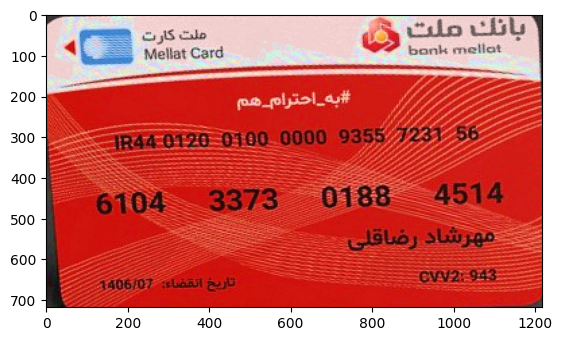

In [331]:
imshow(improveimg)

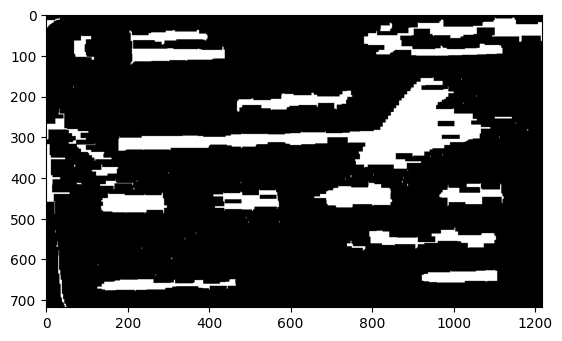

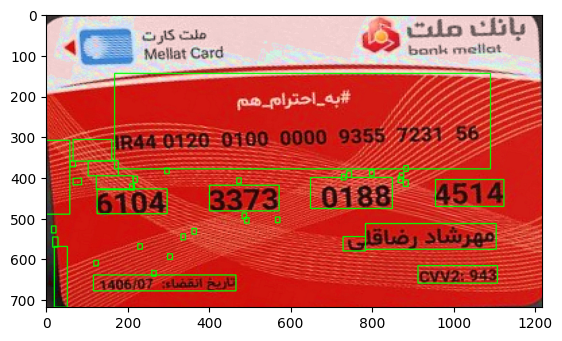

In [339]:
aa=improveimg.copy()
kk=aa.copy()
finalimggray=cv2.cvtColor(improveimg,cv2.COLOR_BGR2GRAY)
plt.imshow(finalimggray,cmap='gray')

# # Threshold the image
# ret, thresh6 = cv2.threshold(finalimggray, 100, 255, cv2.THRESH_BINARY)

# Apply the Sobel filter
sobelx = cv2.Sobel(finalimggray, cv2.CV_8U, 1, 0, ksize=3)
sobelx=np.abs(sobelx)

# Apply thresholding to convert the image to black and white
thresh_value = 100
ret, thresh = cv2.threshold(sobelx, thresh_value, 255, cv2.THRESH_BINARY)


# Define the vertical structuring element
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 4))

# Apply the morphological opening operation
opened = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

# Define the horizontal structuring element
kernel1 = cv2.getStructuringElement(cv2.MORPH_RECT, (40, 10))

# Apply the morphological closing operation
closed = cv2.morphologyEx(opened, cv2.MORPH_CLOSE, kernel1)

imshow(closed)

contours, hierarchy = cv2.findContours(closed , 
    cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

max_width = 0
max_x = 0
max_y = 0
max_h = 0
  
# Draw bounding rectangles for each contour
for cnt in contours:
    # Calculate bounding rectangle for the contour
    x, y, w, h = cv2.boundingRect(cnt)
    x-=10
    y-=10
    w+=10
    h+=10
    # cv2.rectangle(aa, (x, y), (x + w, y + h), (0, 255, 0), 2)
    # Draw the rectangle on the image
    if y+h>(1/2)*aa.shape[0]:
        cv2.rectangle(aa, (x, y), (x + w, y + h), (0, 255, 0), 2)
        if w > max_width:
            max_width = w
            max_x = x
            max_y = y
            max_h = h 
               
# Crop the image using the coordinates of the bounding rectangle with maximum width
# crop_img = kk[max_y:max_y+max_h, max_x:max_x+max_width]
# imshow(crop_img)
# cv2.imwrite('test.jpg',crop_img)  
imshow(aa)



In [333]:
# binary = cv2.medianBlur(finalimggray, 3)
# binary = cv2.adaptiveThreshold(binary, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 3, 8)

# imshow(binary )

160
160


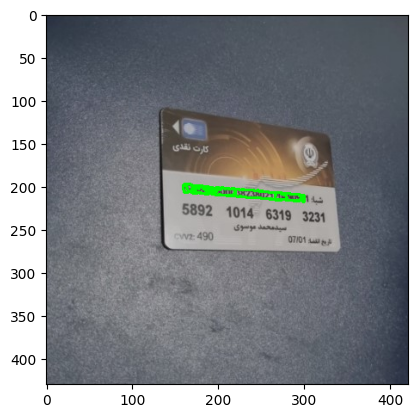

In [334]:
import cv2
import numpy as np

# خواندن تصویر
img = cv2.imread('images/Q4/1.jpg')
img1=img.copy()
# تبدیل تصویر به سیاه و سفید
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# اعمال فیلتر گاوسی برای کاهش نویز تصویر
gray = cv2.GaussianBlur(gray, (5, 5), 0)

# تشخیص لبه ها با استفاده از الگوریتم Canny
edges = cv2.Canny(gray, 50, 200)

# پیدا کردن کنتورهای تصویر
contours, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# پیدا کردن کنتور با بیشترین مساحت
max_area = 0
best_contour = None
for contour in contours:
    area = cv2.contourArea(contour)
    if area > max_area:
        max_area = area
        best_contour = contour
print(min(best_contour[0][0]))
print(min(best_contour[1][0]))
# برش تصویر با استفاده از کنتور با بیشترین مساحت
x, y, w, h = cv2.boundingRect(best_contour)
card = img[y:y+h, x:x+w]
cv2.drawContours(img1, [best_contour], -1, (0, 255, 0), 2)
imshow(img1)

(42, 114, 3)


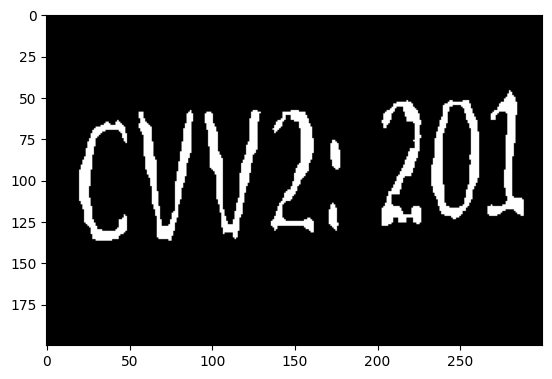

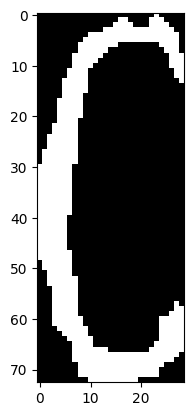

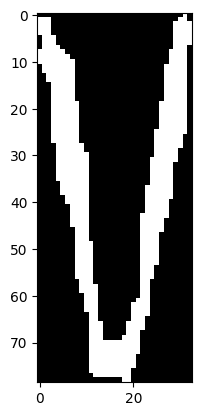

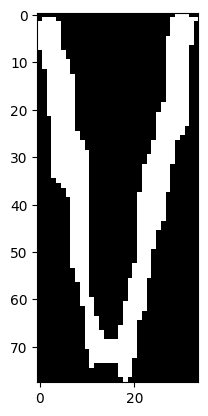

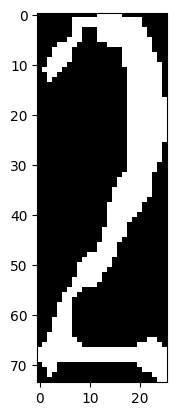

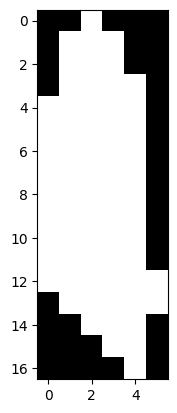

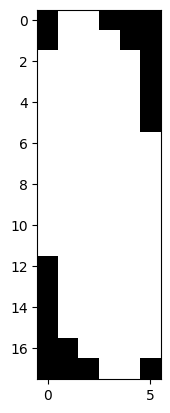

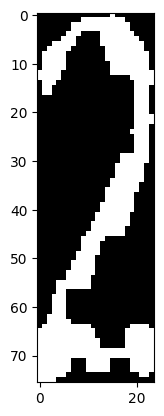

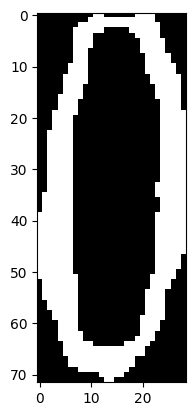

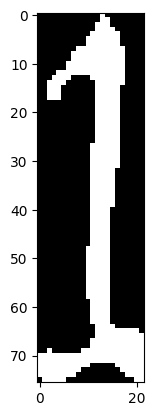

9


In [335]:
# Load the image
img = cv2.imread('196.jpg')
print(img.shape)
ee=img.copy()
# img=cv2.resize((200,300),img)
# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray=cv2.resize(gray,(300,200))
ee=cv2.resize(ee,(300,200))

# # Define the dilation operation

thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 4)

kernel_dilate = np.ones((3, 3), np.uint8)

# Apply the dilation operation to the threshold image
thresh = cv2.erode(thresh  , kernel_dilate, iterations=1)

imshow(thresh)
# Find the contours in the binary image
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# p=0
# for cnt in contours:
#     # Calculate bounding rectangle for the contour
#     x, y, w, h = cv2.boundingRect(cnt)
#     cv2.rectangle(ee, (x, y), (x + w, y + h), (0, 255, 0), 2) 
#     p+=1
#     digit =thresh[y:y+h, x:x+w]
#     imshow(digit)
# imshow(ee)   
# print(p) 

# Initialize a list to store the x coordinates of the bounding rectangles
x_values = []

# Loop over the contours
for contour in contours:
    # Get the bounding rectangle of the contour
    x, y, w, h = cv2.boundingRect(contour)
    # Append the x coordinate of the bounding rectangle to the list
    x_values.append(x)
    
# Sort the bounding rectangles based on their x coordinates
sorted_contours = [contours[i] for i in np.argsort(x_values)]

o=0
# Loop over the sorted contours
for contour in sorted_contours:
    # Get the bounding rectangle of the contour
    x, y, w, h = cv2.boundingRect(contour)    
    # Crop the contour from the image
    if w>img.shape[1]/30:
        digit = thresh[y:y+h, x:x+w]
        o+=1
        imshow(digit)
        aa=str(o+100)+'.jpg'
        cv2.imwrite(aa,digit)
print(o)    
    

In [336]:
def Cardrecognition(finalgrayresize,id_templategray):
  wb,hb=finalgrayresize.shape
  test_img=finalgrayresize.copy()
  typecard='Bank card'
  x, y = 70, 70
  # Perform template matching
  resized_template = cv2.resize(id_templategray, (x,y))
  # resized_template = cv2.adaptiveThreshold(resized_template, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 5, 7)
  result = cv2.matchTemplate(finalgrayresize, resized_template, cv2.TM_CCOEFF_NORMED)
  # Set a threshold for the result
  threshold = 0.7
  # Find the location of the template in the image where the result is greater than the threshold
  loc = np.where(result >= threshold)
  # Draw a rectangle around the template if found
  if loc[0].size > 0 and loc[1].size > 0:
    # print(loc)
    top_left = (loc[1][0], loc[0][0])
    bottom_right = (loc[1][0] + resized_template.shape[1], loc[0][0] + resized_template.shape[0])
    cv2.rectangle(test_img, top_left, bottom_right, (0, 0, 255), 2)
    typecard='National card'
    print(x,y)
  print(typecard)
  # plt.imshow(test_img,cmap='gray')
  plt.imshow(result,cmap='gray')
  plt.colorbar()
  plt.show()
  return typecard